# 1. Titanic Data Set

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.colors as mcolors
import missingno as msno
plt.style.use('seaborn')

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# df_train = pd.read_csv('/kaggle/input/titanic/train.csv')

In [2]:
print(matplotlib.__version__)

3.5.1


In [3]:
df_train = pd.read_csv("./train.csv")

In [4]:
df_train.shape

(891, 12)

df_train data(titanic) 는 891개의 observation와 12개의 variables로 구성되어 있다.

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Age,Cabin에 각각 177개,687개의 결측값이 존재한다.

In [8]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


* Train set의 Age변수에서 19.87%, Cabin 변수에서 77.1%, Embarked에서 0.22%의 결측값이 존재함을 비율로 볼 수 있다.
* Cabin변수에는 약 70%정도의 데이터가 비어있으므로 추후에 변수 제거를 고려

<AxesSubplot:>

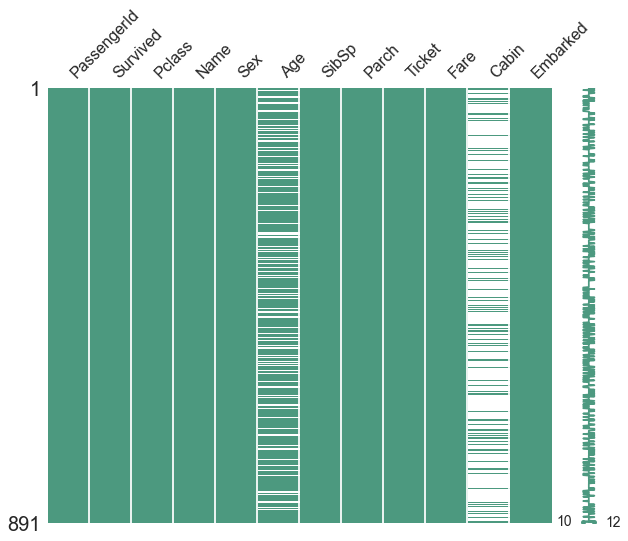

In [9]:
msno.matrix(df=df_train.iloc[:, :], figsize=(10, 8), color=(0.3, 0.6, 0.5))

In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Data Visualization

## - Survived (Target Variable)

C:\Users\GSENR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


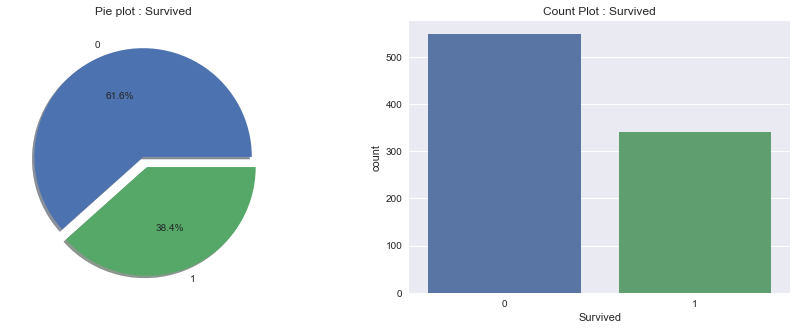

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = axs[0], shadow = True) ## pandas
axs[0].set_title('Pie plot : Survived')
axs[0].set_ylabel('')

sns.countplot('Survived', data = df_train, ax = axs[1])
axs[1].set_title('Count Plot : Survived')

plt.show()

* 전체 탑승객 중 38.4%가 생존하였고, 61.6%가 사망하였다.

In [13]:
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## - Pclass

In [14]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
pclass_ = df_train.groupby(['Pclass']).size()
pclass_

Pclass
1    216
2    184
3    491
dtype: int64

In [16]:
surv_table = pd.crosstab(df_train['Pclass'].astype('str'), df_train['Survived'].astype('str'))
surv_table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [17]:
surv_prob = surv_table.apply(lambda x : x/sum(x), axis = 1)
surv_prob

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


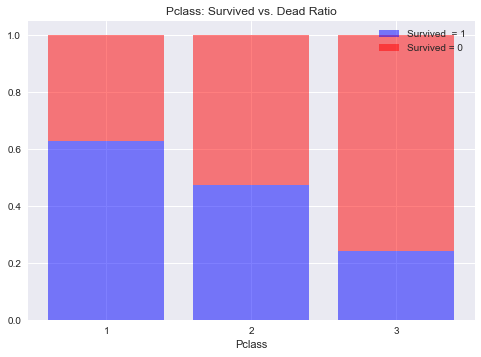

In [18]:
p1 = plt.bar(np.arange(3), surv_prob['1'], alpha=.5, color='blue')
p2 = plt.bar(np.arange(3), surv_prob['0'], alpha=.5, color='red', bottom=surv_prob['1'])

plt.xticks(np.arange(3), pclass_.index)
plt.title("Pclass: Survived vs. Dead Ratio")
plt.xlabel('Pclass')
plt.legend((p1[0], p2[0]), ('Survived  = 1', 'Survived = 0'))
plt.show()

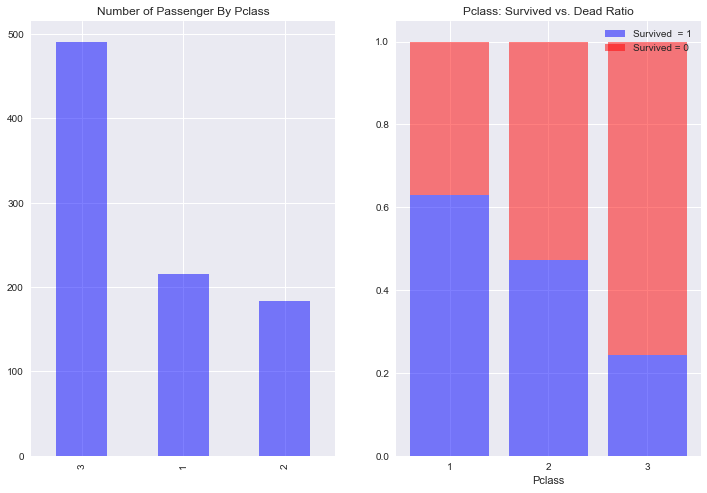

In [19]:
fig, axs = plt.subplots(1, 2, figsize = (12, 8))
df_train['Pclass'].value_counts().plot.bar(ax = axs[0], color='blue', alpha=.5)
axs[0].set_title('Number of Passenger By Pclass')

p1 = plt.bar(np.arange(3), surv_prob['1'], alpha=.5, color='blue')
p2 = plt.bar(np.arange(3), surv_prob['0'], alpha=.5, color='red', bottom=surv_prob['1'])

plt.xticks(np.arange(3), pclass_.index)
plt.title("Pclass: Survived vs. Dead Ratio")
plt.xlabel('Pclass')
plt.legend((p1[0], p2[0]), ('Survived  = 1', 'Survived = 0'))
plt.show()

plt.show()

* 클래스가 낮은 3등급 탑승객이 가장 많다.
    * (3등급 > 1등급 > 2등급)
* **클래스가 높은 등급일수록, 생존 확률이 높은 것**을 확인할 수 있다.
    * 1등급 (63%) > 2등급 (47%) > 3등급(24%)

## - Age

In [20]:
# Age의 요약통계량
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
print("탑승객의 평균 나이 : {:.2f} Years".format(df_train['Age'].mean()))
print("제일 어린 탑승객의 나이 : {:.2f} Years".format(df_train['Age'].min()))
print("제일 나이 많은 탑승객의 나이 : {:.2f} Years".format(df_train['Age'].max()))

탑승객의 평균 나이 : 29.70 Years
제일 어린 탑승객의 나이 : 0.42 Years
제일 나이 많은 탑승객의 나이 : 80.00 Years


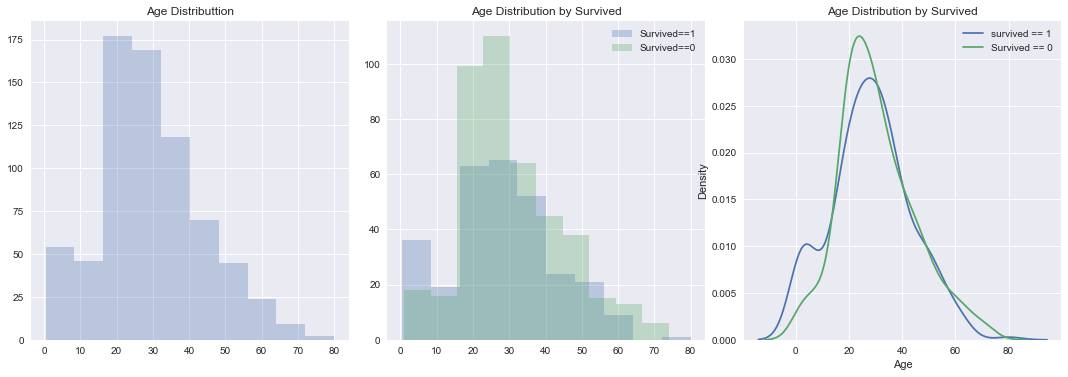

In [22]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
plt.tight_layout()

axs[0].hist(df_train['Age'], alpha=.3)
axs[0].set_title('Age Distributtion')

axs[1].hist(df_train[df_train['Survived']==1]['Age'], alpha=.3, label = 'Survived==1')
axs[1].hist(df_train[df_train['Survived']==0]['Age'], alpha=.3, label = 'Survived==0')
axs[1].set_title('Age Distribution by Survived')
axs[1].legend()

sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax = axs[2])
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax = axs[2])
axs[2].set_title('Age Distribution by Survived')

plt.legend(['survived == 1', 'Survived == 0'])
plt.show()

* 가장 왼쪽의 전체 탑승객의 나이 분포를 보면 20~40대에 대다수가 있다.
* 생존에 따른 연령분포를 시각화한 결과 유일하게 사망한 사람보다 살아남은 사람이 더 많은 연령대는 0~19(유아, 학생..)

## - Sex

C:\Users\GSENR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


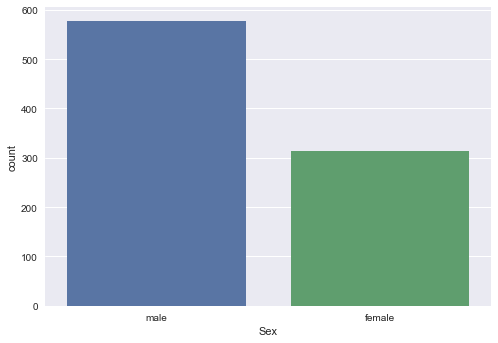

In [23]:
sns.countplot(df_train['Sex'])
plt.show()

In [24]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


C:\Users\GSENR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


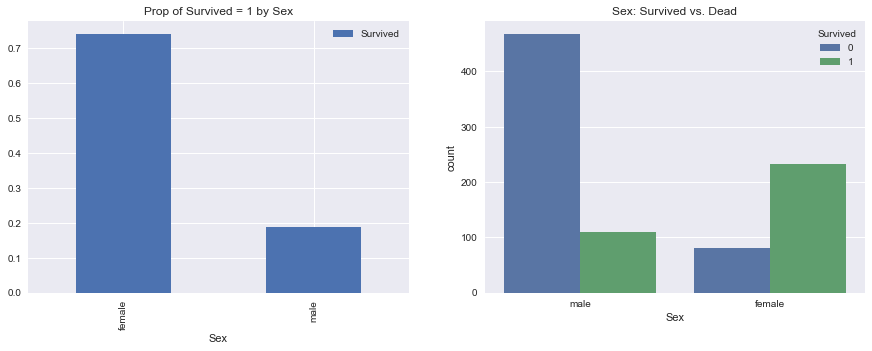

In [25]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=axs[0])
axs[0].set_title('Prop of Survived = 1 by Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=axs[1])
axs[1].set_title("Sex: Survived vs. Dead")
plt.show()

* 여자가 살아남을 확률이 더 높게 나타났다.

## - SibSp, Parch

C:\Users\GSENR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GSENR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


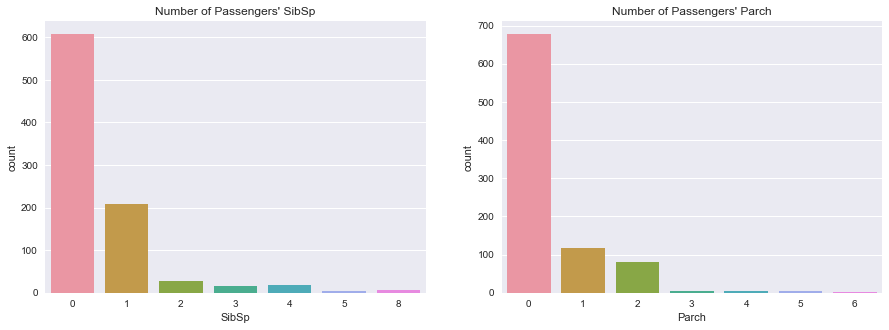

In [26]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.countplot('SibSp', data=df_train, ax=axs[0])
axs[0].set_title("Number of Passengers' SibSp" )

sns.countplot('Parch', data=df_train, ax=axs[1])
axs[1].set_title("Number of Passengers' Parch")
plt.show()

* 위의 그래프는 함께 탑승한 형제/자매,부모님/자녀의 수의 countplot이다.
* 함께 탑승한 형제/자매 혹은 부모님/자식이 있을 경우 생존율의 차이가 있는지를 보고싶다.
* SibSp, Parch 각각을 따로 보는 것보다 두 변수를 더해 새로운 Family_size라는 파생변수를 만들어 보는 것이 가족과 함께 탑승했는지 혼자인지에 따라 생존율 차이가 있는지 보기에 더 적합할 것 같다.

## - Create Derived Variable > Family_Size

In [27]:
df_train['Family_size'] = df_train['SibSp'] + df_train['Parch'] + 1

In [28]:
df_train['Family_size'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: Family_size, dtype: float64

C:\Users\GSENR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GSENR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


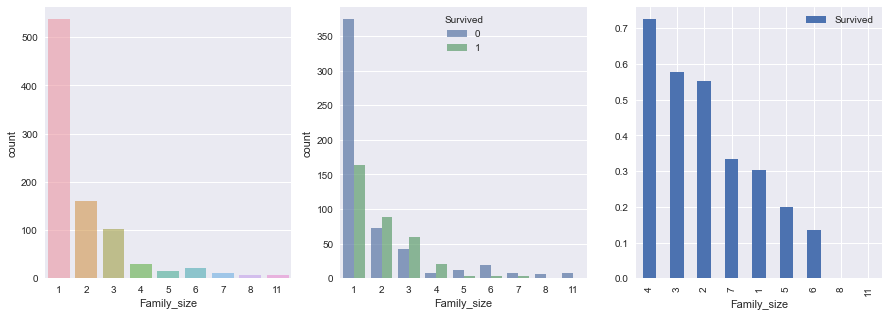

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot('Family_size', data = df_train, ax=axs[0], alpha=.6)

sns.countplot('Family_size', hue = 'Survived', data = df_train, alpha=.7, ax=axs[1])

df_train[['Family_size', 'Survived']].groupby(['Family_size'], as_index = True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=axs[2])

plt.show()

* 혼자 탑승한 탑승객의 수가 가장 높게 나타났다.
* Family size가 4명인 경우의 생존 확률이 가장 높게 나타났다.

## Fare

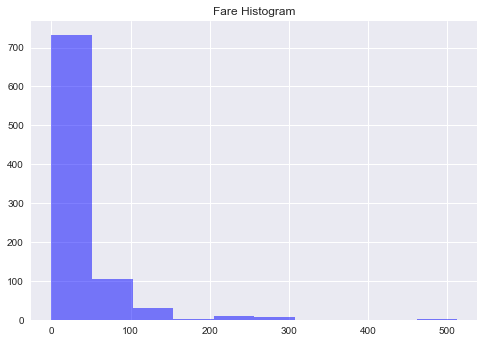

In [30]:
plt.hist(df_train['Fare'], color='b', alpha=.5)
plt.title("Fare Histogram")
plt.show()

* 위의 그림은 Fare의 히스토그램으로 right-skewed distribution으로 data가 왼쪽으로 매우 치우쳐저 있음을 확인할 수 있다.(추후에 log전환이 필요해보인다..)

C:\Users\GSENR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


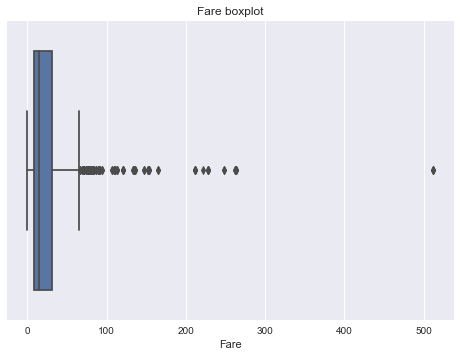

In [31]:
sns.boxplot(df_train['Fare'])
plt.title("Fare boxplot")
plt.show()

## - Embarked

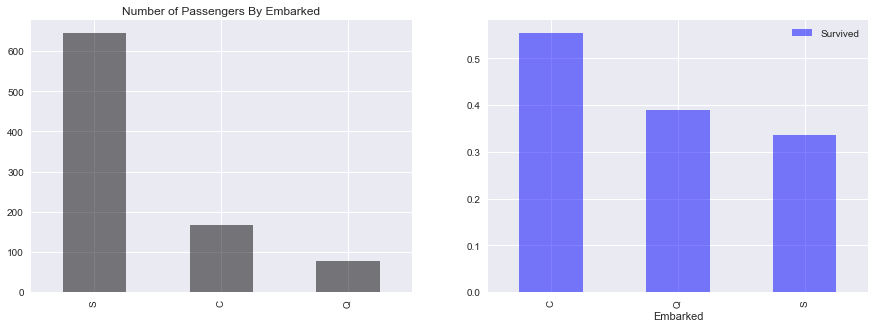

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
df_train['Embarked'].value_counts().plot.bar(ax = axs[0], color='black', alpha=.5)
axs[0].set_title('Number of Passengers By Embarked')

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(color='blue',alpha=.5,ax=axs[1])
plt.show()

* Southampton항구에서의 탑승객이 가장 많다.
    * Southampton > Cherbourg > Queenstown
* 생존율이 가장 높은 탑승 항구는 Cherbourg
    * Cherbourg > Queenstown > Southampton
* Southampton에서의 탑승객이 가장 많지만 생존률이 제일 낮음을 확인

## - Age & Fare

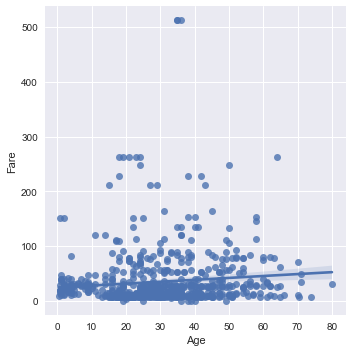

In [33]:
sns.lmplot(x='Age', y='Fare', data = df_train)
plt.show()

In [34]:
# sns.pairplot(df_train)